In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

In [32]:
#defining a constant
epsilon_0 = (8.85)*10**(-12)  #C^2 / N m^2
lambda_0  = 1 #just  let the charge  density be 1 

In [34]:
#The ine
def integrand_Ex( theta , x_R , y_R , z_R   ):
    numerator = x_R*lambda_0*np.sin(theta) - lambda_0*np.sin(theta)*np.cos(theta)
    denominator = x_R**2 + y_R**2 +  z_R**2 + 1 -(2*x_R*np.cos(theta)) -(2*y_R*np.sin(theta))
    return numerator / (denominator**(3/2))

In [41]:
def integrand_Ey( theta , x_R , y_R , z_R   ):
    numerator = y_R*lambda_0*np.sin(theta) - lambda_0*(np.sin(theta)**2)
    denominator = x_R**2 + y_R**2 +  z_R**2 + 1 -(2*x_R*np.cos(theta)) -(2*y_R*np.sin(theta))
    return numerator / (denominator**(3/2))

In [42]:
def E_x( x_R ,  y_R , z_R):
    
    factor = 1/(4*np.pi*epsilon_0)
    
    return factor* quad( integrand_Ex , 0 , 2*np.pi , args=(x_R,y_R,z_R))[0]
#quad will integrate the function  for integrand over the bounds 0 to 2pi with the arguments x_R y_R and z_R
#the first thing quad returns is the value of the integral 

In [43]:
def E_y( x_R ,  y_R , z_R):
    
    factor = 1/(4*np.pi*epsilon_0)
    
    return factor* quad( integrand_Ey , 0 , 2*np.pi , args=(x_R,y_R,z_R))[0]

In [59]:
x  = np.linspace(-1/2,1/2,1000)

In [60]:
electric_Ex = np.vectorize(E_x)(x,-1/2,0)
#magntidue of the  electric field over:
#the  x/R values from (-1/2,1/2) 
#holding y/R at a constant value of 1/2
#holding z/R at 0 ( so in the xy plane )

In [61]:
electric_Ey = np.vectorize(E_y)(x,-1/2,0)

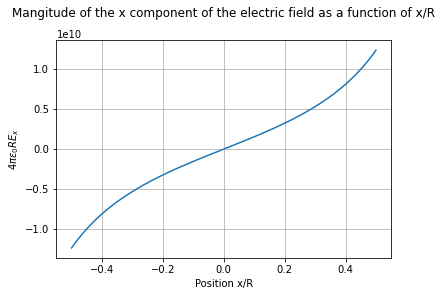

In [65]:
plt.close(1);plt.figure(1)
plt.plot(x, electric_Ex)
plt.grid()
plt.xlabel('Position x/R');plt.ylabel('$4 \pi \epsilon _0 R E_x$')
t=plt.title('Mangitude of the x component of the electric field as a function of x/R',y=1.08)


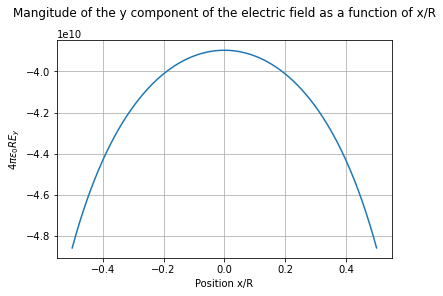

In [64]:
plt.plot(x, electric_Ey)
plt.grid()
plt.xlabel('Position x/R');plt.ylabel('$4 \pi \epsilon _0 R E_y$')
t2=plt.title('Mangitude of the y component of the electric field as a function of x/R',y=1.08)